In [19]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
import matplotlib as mpl

In [26]:
veg_file = rasterio.open('../data/forests/MOD_NDVI_16_2024-12-18_rgb_3600x1800.TIFF')
veg = veg_file.read()

In [14]:
print(np.amin(veg), np.amax(veg))
print(len(np.unique(veg)))

0 255
256


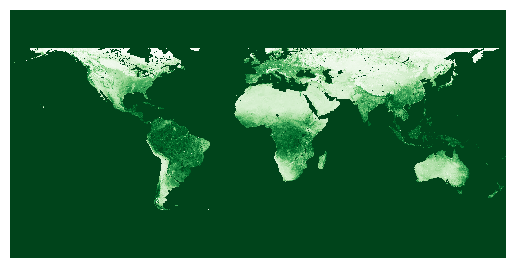

In [20]:
fig, ax = plt.subplots()

ax.imshow(veg[0], cmap='Greens', interpolation='nearest')
ax.axis('off')
plt.show()

In [21]:
greens = mpl.colormaps['Greens'].resampled(255)
newcolors = greens(np.linspace(0, 1, 255))
backgroud_colors = np.array([[0, 0, 0, 0]])
newcolors[:1, :] = backgroud_colors
newcmp = ListedColormap(newcolors)

In [22]:
bounds = np.arange(255)

norm_veg = BoundaryNorm(bounds, newcmp.N)

In [23]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

In [27]:
veg[0][veg[0] == 255] = 0

ourcmp = mpl.colormaps.get_cmap('Greens').resampled(254)

newcolors = ourcmp(np.linspace(0, 1, 254))
background_colors = np.array([[0, 0, 0, 0]])
newcolors[:1, :] = background_colors
newcmp = ListedColormap(newcolors)


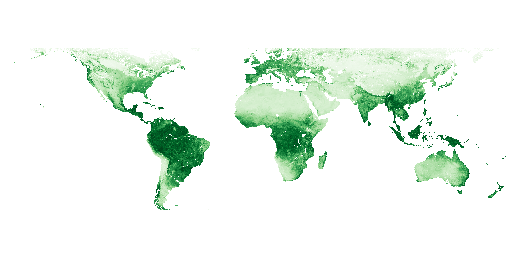

In [28]:
fig = plt.figure()

ax = plt.axes()

ax.imshow(veg[0], cmap=newcmp, norm=norm_veg, interpolation='nearest')
ax.axis('off')
plt.show()

In [29]:
# find files MON_NDVI in the data/vegetation directory

from os import listdir
from os.path import isfile, join



In [35]:
files = [f for f in listdir('../data/vegetation') if isfile(join('../data/vegetation', f))]

files.sort()
print(files)

['MOD_NDVI_M_2000-02.TIFF', 'MOD_NDVI_M_2000-03.TIFF', 'MOD_NDVI_M_2000-04.TIFF', 'MOD_NDVI_M_2000-05.TIFF', 'MOD_NDVI_M_2000-06.TIFF', 'MOD_NDVI_M_2000-07.TIFF', 'MOD_NDVI_M_2000-08.TIFF', 'MOD_NDVI_M_2000-09.TIFF', 'MOD_NDVI_M_2000-10.TIFF', 'MOD_NDVI_M_2000-11.TIFF', 'MOD_NDVI_M_2000-12.TIFF', 'MOD_NDVI_M_2001-01.TIFF', 'MOD_NDVI_M_2001-02.TIFF', 'MOD_NDVI_M_2001-03.TIFF', 'MOD_NDVI_M_2001-04.TIFF', 'MOD_NDVI_M_2001-05.TIFF', 'MOD_NDVI_M_2001-06.TIFF', 'MOD_NDVI_M_2001-07.TIFF', 'MOD_NDVI_M_2001-08.TIFF', 'MOD_NDVI_M_2001-09.TIFF', 'MOD_NDVI_M_2001-10.TIFF', 'MOD_NDVI_M_2001-11.TIFF', 'MOD_NDVI_M_2001-12.TIFF', 'MOD_NDVI_M_2002-01.TIFF', 'MOD_NDVI_M_2002-02.TIFF', 'MOD_NDVI_M_2002-03.TIFF', 'MOD_NDVI_M_2002-04.TIFF', 'MOD_NDVI_M_2002-05.TIFF', 'MOD_NDVI_M_2002-06.TIFF', 'MOD_NDVI_M_2002-07.TIFF', 'MOD_NDVI_M_2002-08.TIFF', 'MOD_NDVI_M_2002-09.TIFF', 'MOD_NDVI_M_2002-10.TIFF', 'MOD_NDVI_M_2002-11.TIFF', 'MOD_NDVI_M_2002-12.TIFF', 'MOD_NDVI_M_2003-01.TIFF', 'MOD_NDVI_M_2003-02.TIFF', 

In [40]:
print(files[0][-12:-5])

2000-02


In [ ]:
for f in files:
      veg_file = rasterio.open('../data/vegetation/' + f)
      veg = veg_file.read()
   
      veg[0][veg[0] == 255] = 0   
   
      fig = plt.figure()
   
      ax = plt.axes()
   
      ax.imshow(veg[0], cmap=newcmp, norm=norm_veg, interpolation='nearest')
      ax.axis('off')
      ax.text(0.1, 0.1, f[-12:-5], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
      # plt.show()
      plt.savefig('../data/vegetation/' + f[-12:-5] + '.png')

In [54]:
frame_files = [f for f in listdir('../figures/vegetation/frames') if isfile(join('../figures/vegetation/frames', f))]
frame_files.sort()
print(frame_files)

['2000-02.png', '2000-03.png', '2000-04.png', '2000-05.png', '2000-06.png', '2000-07.png', '2000-08.png', '2000-09.png', '2000-10.png', '2000-11.png', '2000-12.png', '2001-01.png', '2001-02.png', '2001-03.png', '2001-04.png', '2001-05.png', '2001-06.png', '2001-07.png', '2001-08.png', '2001-09.png', '2001-10.png', '2001-11.png', '2001-12.png', '2002-01.png', '2002-02.png', '2002-03.png', '2002-04.png', '2002-05.png', '2002-06.png', '2002-07.png', '2002-08.png', '2002-09.png', '2002-10.png', '2002-11.png', '2002-12.png', '2003-01.png', '2003-02.png', '2003-03.png', '2003-04.png', '2003-05.png', '2003-06.png', '2003-07.png', '2003-08.png', '2003-09.png', '2003-10.png', '2003-11.png', '2003-12.png', '2004-01.png', '2004-02.png', '2004-03.png', '2004-04.png', '2004-05.png', '2004-06.png', '2004-07.png', '2004-08.png', '2004-09.png', '2004-10.png', '2004-11.png', '2004-12.png', '2005-01.png', '2005-02.png', '2005-03.png', '2005-04.png', '2005-05.png', '2005-06.png', '2005-07.png', '2005-08.

In [55]:
import imageio

In [56]:
with imageio.get_writer('../figures/vegetation/vegetation.gif', mode='I') as writer:
    for filename in frame_files:
        image = imageio.imread('../figures/vegetation/frames/' + filename)
        writer.append_data(image)

/var/folders/sc/9_2y0t950z3cbf1xfrh2glh007jfqm/T/ipykernel_3197/2845791037.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('../figures/vegetation/frames/' + filename)
